# INIT

In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
raw_data = "./raw_data/"
raw_artists = pd.read_csv(f'{raw_data}raw_artists.csv', sep=';', index_col=0)
raw_tracks = pd.read_csv(f'{raw_data}raw_tracks.csv', sep=',', index_col=0)

In [4]:
data = "./data/"
artists = pd.read_csv(f'{data}artists.csv', sep=';', index_col=0)
tracks = pd.read_csv(f'{data}tracks.csv', sep=',', index_col=0)

# DATA UNDERSTANDING ARTISTS

In [5]:
raw_artists.info()

raw_artists.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, ART82291002 to ART83631935
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          104 non-null    object 
 1   gender        104 non-null    object 
 2   birth_date    73 non-null     object 
 3   birth_place   72 non-null     object 
 4   nationality   71 non-null     object 
 5   description   86 non-null     object 
 6   active_start  50 non-null     object 
 7   active_end    0 non-null      float64
 8   province      70 non-null     object 
 9   region        68 non-null     object 
 10  country       70 non-null     object 
 11  latitude      72 non-null     float64
 12  longitude     72 non-null     float64
dtypes: float64(3), object(10)
memory usage: 11.4+ KB


,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
count,104,104,73,72,71,86,50,0.0,70,68,70,72.000000,72.000000
unique,104,2,73,40,2,69,24,NaN,26,13,1,NaN,NaN
top,99 posse,M,1990-07-11,Milano,Italia,gruppo musicale italiano,1996-01-01,NaN,Milano,Lombardia,Italia,NaN,NaN
freq,1,87,1,15,70,6,6,NaN,19,24,70,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.591374,11.060876
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.248674,2.591871
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.747452,7.525403
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.577547,9.189635
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.067755,9.917118
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.464194,12.482932


In [6]:
# Informazioni generali sul dataset
summary = pd.DataFrame({
    'dtype': artists.dtypes,
    'unique_values': artists.nunique(),
    'missing_values': artists.isna().sum(),
    'missing_percent': artists.isna().mean() * 100
})
# Ordina il riepilogo per numero decrescente di valori mancanti
summary = summary.sort_values(by='missing_values', ascending=False)
print(summary)

                dtype  unique_values  missing_values  missing_percent
active_end    float64              0             104       100.000000
active_start   object             24              54        51.923077
region         object             13              36        34.615385
province       object             26              34        32.692308
country        object              1              34        32.692308
nationality    object              2              33        31.730769
latitude      float64             40              32        30.769231
longitude     float64             40              32        30.769231
birth_place    object             40              32        30.769231
birth_date     object             73              31        29.807692
description    object             69              18        17.307692
gender         object              2               0         0.000000
name           object            104               0         0.000000


In [7]:
print("We drop active-end, latitude and longitude due to high missing values and low impact on the analysis")
artists = artists.drop(columns=['active_end', 'latitude', 'longitude'])

We drop active-end, latitude and longitude due to high missing values and low impact on the analysis


In [8]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, ART82291002 to ART83631935
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          104 non-null    object
 1   gender        104 non-null    object
 2   birth_date    73 non-null     object
 3   birth_place   72 non-null     object
 4   nationality   71 non-null     object
 5   description   86 non-null     object
 6   active_start  50 non-null     object
 7   province      70 non-null     object
 8   region        68 non-null     object
 9   country       70 non-null     object
dtypes: object(10)
memory usage: 8.9+ KB


In [9]:
print("we fill missng nationalities with 'Italia' as basically all of them are italians")
artists["nationality"] = artists["nationality"].fillna("Italia")

artists.info()

we fill missng nationalities with 'Italia' as basically all of them are italians
<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, ART82291002 to ART83631935
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          104 non-null    object
 1   gender        104 non-null    object
 2   birth_date    73 non-null     object
 3   birth_place   72 non-null     object
 4   nationality   104 non-null    object
 5   description   86 non-null     object
 6   active_start  50 non-null     object
 7   province      70 non-null     object
 8   region        68 non-null     object
 9   country       70 non-null     object
dtypes: object(10)
memory usage: 8.9+ KB


In [10]:
print("We correct the birth date and place of shiva")
artists.loc[artists["name"] == "shiva", ["birth_date","birth_place"]] = [["1999-08-27","Genova"]]
print(artists.loc[artists["name"] == "shiva",["name","birth_date"]])

We correct the birth date and place of shiva
              name  birth_date
id_author                     
ART64850829  shiva  1999-08-27


In [11]:
artists['birth_date'] = pd.to_datetime(artists['birth_date'], errors='coerce').dt.year
print(artists['birth_date'].describe())

count      73.000000
mean     1987.041096
std         8.954264
min      1967.000000
25%      1980.000000
50%      1989.000000
75%      1994.000000
max      2002.000000
Name: birth_date, dtype: float64


In [12]:
print(artists['birth_place'].describe())

count         73
unique        40
top       Milano
freq          15
Name: birth_place, dtype: object


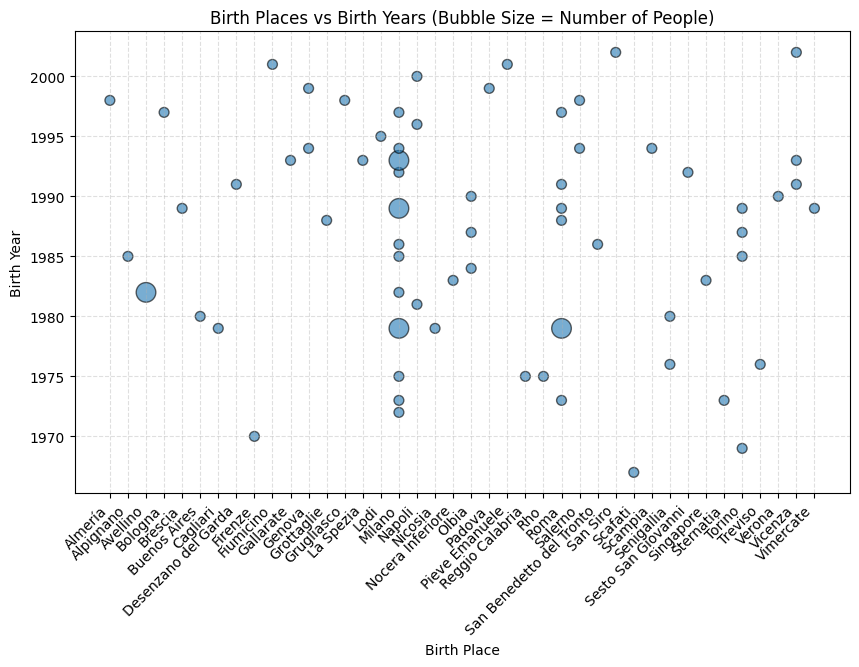

In [13]:
counts = (
    artists.groupby(['birth_place', 'birth_date'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(10,6))
plt.scatter(
    counts['birth_place'], 
    counts['birth_date'], 
    s=(counts['count'] ** 2) * 50,  # scale up sizes for visibility
    alpha=0.6, 
    edgecolor='k'
)

plt.xlabel('Birth Place')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Birth Year')
plt.title('Birth Places vs Birth Years (Bubble Size = Number of People)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


### Inference of artists data when possible

In [14]:
print("Identify rows with many missing values")
missing_pct = artists.isna().mean(axis=1)

threshold = 0.4
rows_with_many_missing = artists[missing_pct > threshold]
print(rows_with_many_missing)

Identify rows with many missing values
                          name gender  birth_date birth_place nationality  \
id_author                                                                   
ART82291002           99 posse      M         NaN         NaN      Italia   
ART18853907               alfa      M         NaN         NaN      Italia   
ART64265460          anna pepe      F         NaN         NaN      Italia   
ART75741740        articolo 31      M         NaN         NaN      Italia   
ART19605256               beba      F         NaN         NaN      Italia   
ART02666525            bigmama      F         NaN         NaN      Italia   
ART03111237             brusco      M         NaN         NaN      Italia   
ART95365016           bushwaka      M         NaN         NaN      Italia   
ART28846313             caneda      M         NaN         NaN      Italia   
ART81071062          club dogo      M         NaN         NaN      Italia   
ART85821920  colle der fomento      M

In [15]:
#CHECK OF HOW MUCH DATA WE LOSE IF WE DROP THESE ROWS

# print(tracks.columns)
# print(rows_with_many_missing.columns)
# print(artists.columns)

merged = tracks.merge(
    artists,
    left_on="id_artist",
    right_on="id_author",  
    how="left"
)

merged = merged[merged["id_artist"].isin(rows_with_many_missing.index)]
# print(merged[["id_artist", "name", "title", "birth_place", "birth_date", "year"]])
temp = merged[["id_artist", "name", "title", "birth_place", "birth_date", "year", "active_start"]]
temp.to_csv("./data/temp/tracks_artists_with_many_missing.csv", sep=';', index=False)
# print(merged.describe())
# print(merged.info())
# print(merged)

In [16]:
rows_with_many_missing.to_csv("./data/temp/artists_with_many_missing.csv", sep=';', index=False)


In [17]:
# IMPORT MISSING VALUES FROM OUTSIDE SOURCE
gpt = pd.read_csv("./data/temp/gpt_missing_artists.csv", sep=';', index_col=0)

In [18]:
# CHECK HOW MANY ARE STILL MISSING

gpt = gpt[gpt["birth_date"].isna()]
# print(gpt)

merged_gpt = tracks.merge(
    artists,
    left_on="id_artist",
    right_on="id_author",
    how="left"
)

matching_ids = artists.loc[artists["name"].isin(gpt.index)].index
# print(matching_ids)
merged_gpt = merged_gpt[merged_gpt["id_artist"].isin(matching_ids)]
print(merged_gpt.info())
print(merged_gpt[["id_artist", "name", "title", "birth_place", "birth_date", "year"]])

merged_gpt.to_csv("./data/temp/tracks_artists_gpt_missing.csv", sep=';', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 1806 to 9828
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_artist             1121 non-null   object 
 1   name_artist           1121 non-null   object 
 2   full_title            1121 non-null   object 
 3   title                 1121 non-null   object 
 4   featured_artists      312 non-null    object 
 5   primary_artist        1121 non-null   object 
 6   language              1108 non-null   object 
 7   album                 1030 non-null   object 
 8   stats_pageviews       318 non-null    float64
 9   swear_IT              1121 non-null   int64  
 10  swear_EN              1121 non-null   int64  
 11  swear_IT_words        1121 non-null   object 
 12  swear_EN_words        1121 non-null   object 
 13  year                  1079 non-null   object 
 14  month                 961 non-null    float64
 15  day                   9

In [21]:
raw_tracks.to_csv("./data/temp/prova.csv", sep=';')